# 实战案例2: 移动应用数据分析

**作者：** Robin  
**日期：** 2018/09  
**数据集来源：** [Kaggle](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)  
**声明：** [小象学院](http://www.chinahadoop.cn/)拥有完全知识产权的权利；只限于善意学习者在本课程使用，不得在课程范围外向任何第三方散播。任何其他人或机构不得盗版、复制、仿造其中的创意，我们将保留一切通过法律手段追究违反者的权利

## 1. 案例描述

随着移动智能设备的普及，用户的信息获取从以浏览器为入口的方式转化为独立移动应用，通过独立应用程序的方式获取所需要的信息和使用需求。至此，在 PC 时代的一切流量通过浏览器传递，并以此了解背后人群的方式被打破，独立应用程序的盛行，使得用户行为信息更加离散和碎片，只了解用户在自己应用中的使用行为，却无法串联整个移动设备的行为信息（形成了“信息孤岛”效应）。但对应用开发者而言，分析自身的应用则可以进一步了解移动用户，加之结合行业数据，则可以改进信息传递和产品体验。

该项目通过分析移动应用数据，从而充分了解移动应用的运营状况，以趋势，对比等方式，了解变化及问题所在，及早发现问题，并制定解决方案。

## 2. 数据集描述

* 提供的数据集为AppleStore.csv，包含了app的相关属性
* 数据字典（主要列名解释）：
    * **id**: App ID
    * **track_name**: App名称
    * **size_bytes**: App大小（单位：Byte）
    * **price**: App价格
    * **rating_count_tot**: 所有评论数
    * **rating_count_ver**: 对应版本的评论数
    * **prime_genre**: App主分类

## 3. 任务描述
该项目需要解决以下5个问题：
1. 收费App的价格分布
2. App的分类对价格有何影响？
3. 收费App与免费App的对比
4. 收费App与评分的关系？
5. App的价格和大小的关系？

## 4. 代码实现

### 4.1 认识数据

In [1]:
import os
import pandas as pd

# 声明数据集路径
data_path = './data'
app_store_datafile = os.path.join(data_path, 'AppleStore.csv')

# 读取数据
app_store_data = pd.read_csv(app_store_datafile, index_col=0)

预览数据

In [2]:
print('该数据集共有{}行，{}列'.format(app_store_data.shape[0], app_store_data.shape[1]))

该数据集共有7197行，16列


In [3]:
app_store_data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
app_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 955.9+ KB


In [5]:
app_store_data.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


### 4.2 处理数据及分析

#### 4.2.1 收费App的价格分布

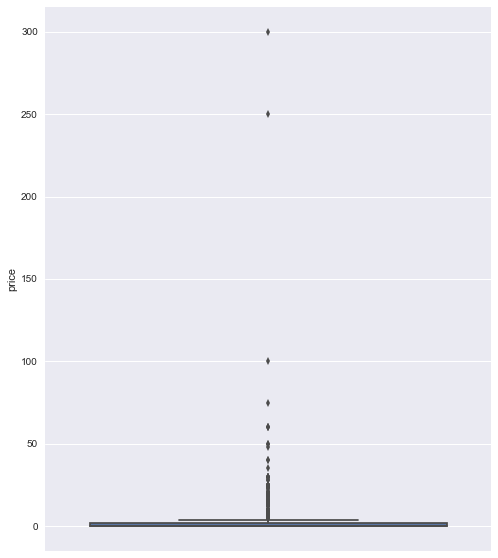

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 先尝试用boxplot观察价格分布
plt.figure(figsize=(8, 10))
sns.boxplot(data=app_store_data, y='price')

说明价格列存在一些特殊值：
* 价格为0
* 价格特别高

所以，要得出有意义的分析，需要去掉这些“特殊值”

In [7]:
print('所有App的数量：', app_store_data.shape[0])

# 免费的应用
free_apps = app_store_data[app_store_data['price'] == 0]
print('免费App的数量：', free_apps.shape[0])

# 价格特别高的App
outlier_apps = app_store_data[app_store_data['price'] > 50]
print('价格超过$50的App的数量：', outlier_apps.shape[0])

outlier_apps

所有App的数量： 7197
免费App的数量： 4056
价格超过$50的App的数量： 7


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
129,308368164,Proloquo2Go - Symbol-based AAC,723764224,USD,249.99,773,10,4.0,3.5,5.0.1,4+,Education,37,5,3,1
184,320279293,NAVIGON Europe,144412672,USD,74.99,927,3,3.5,2.5,2.17,4+,Navigation,37,2,21,1
1324,491998279,Articulation Station Pro,425919488,USD,59.99,294,130,4.5,5.0,2.2.3,4+,Education,38,5,1,1
1714,551215116,LAMP Words For Life,583263232,USD,299.99,41,0,4.0,0.0,1.5.5,4+,Education,24,5,1,1
2541,700440156,Articulation Test Center Pro,174737408,USD,59.99,29,0,4.5,0.0,2.6,4+,Education,24,5,1,1
3043,849732663,KNFB Reader,106429440,USD,99.99,71,0,4.5,0.0,2.7.3,4+,Productivity,37,5,14,1
3899,946930094,FineScanner Pro - PDF Document Scanner App + OCR,63974400,USD,59.99,100,4,4.0,4.5,6.2.5,4+,Business,37,5,12,1


In [8]:
# 去掉特殊值再查看分析结果
filter_cond1 = app_store_data['price'] == 0
filter_cond2 = app_store_data['price'] > 50

normal_apps = app_store_data[~(filter_cond1 | filter_cond2)].copy()
print('正常价格的App数量：', normal_apps.shape[0] )

正常价格的App数量： 3134


* 使用盒子图查看价格分布

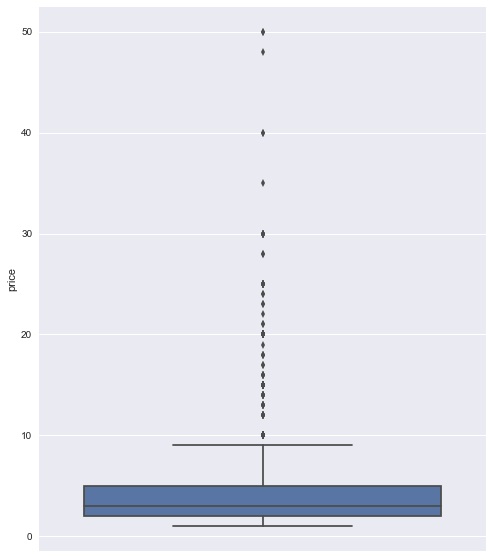

In [9]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=normal_apps, y='price')

* 使用Pandas的分位数函数查看价格分布

In [10]:
quantile_list = [0, 0.25, 0.5, 0.75, 1]
normal_apps['price'].quantile(quantile_list)

0.00     0.99
0.25     1.99
0.50     2.99
0.75     4.99
1.00    49.99
Name: price, dtype: float64

* 使用直方图查看价格分布

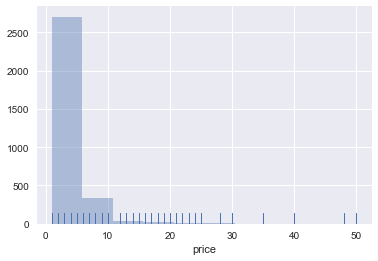

In [11]:
sns.distplot(normal_apps['price'], bins=10, kde=False, rug=True)

##### 结论:
通过观察收费App的价格分布，发现：
1. 随着价格的增长，App数量呈“指数级”下降
2. 价格高于$30的App很少，可以此作为App的定价参考

#### 4.2.2 App的分类对价格有何影响？

In [12]:
# 按分类观察App数量
normal_apps['prime_genre'].value_counts()

Games                1605
Education             317
Entertainment         201
Photo & Video         182
Utilities             139
Productivity          115
Health & Fitness      104
Music                  71
Lifestyle              50
Book                   46
Reference              44
Weather                41
Business               36
Sports                 35
Travel                 25
Navigation             25
Social Networking      24
Finance                20
Food & Drink           20
News                   17
Medical                15
Shopping                1
Catalogs                1
Name: prime_genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

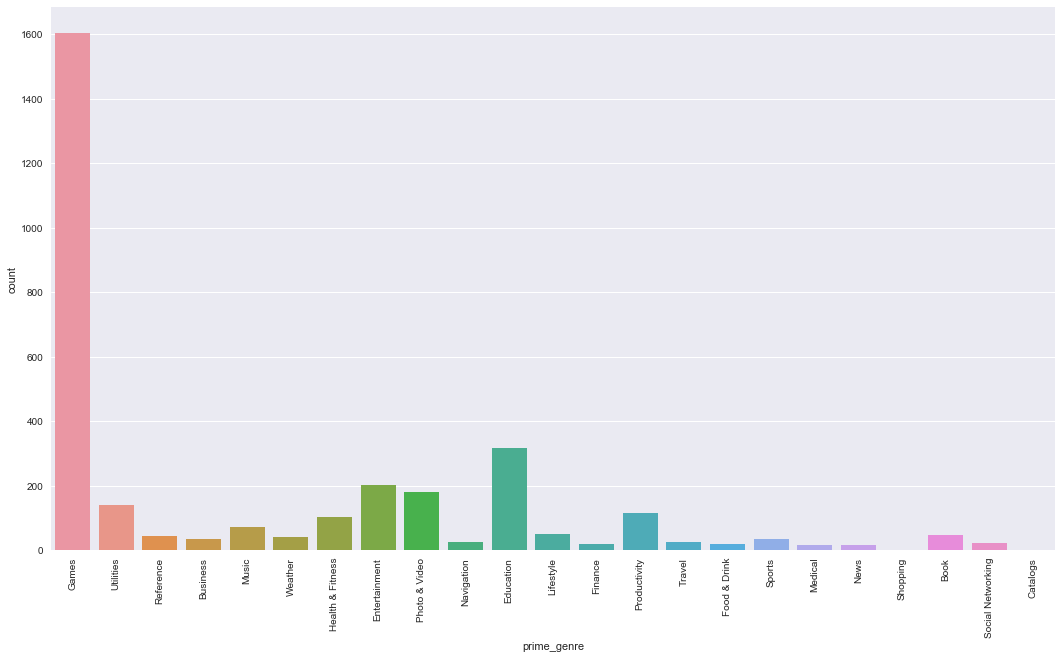

In [13]:
# 可视化按分类观察App数量
plt.figure(figsize=(18, 10))
sns.countplot(normal_apps['prime_genre'])
plt.xticks(rotation=90)

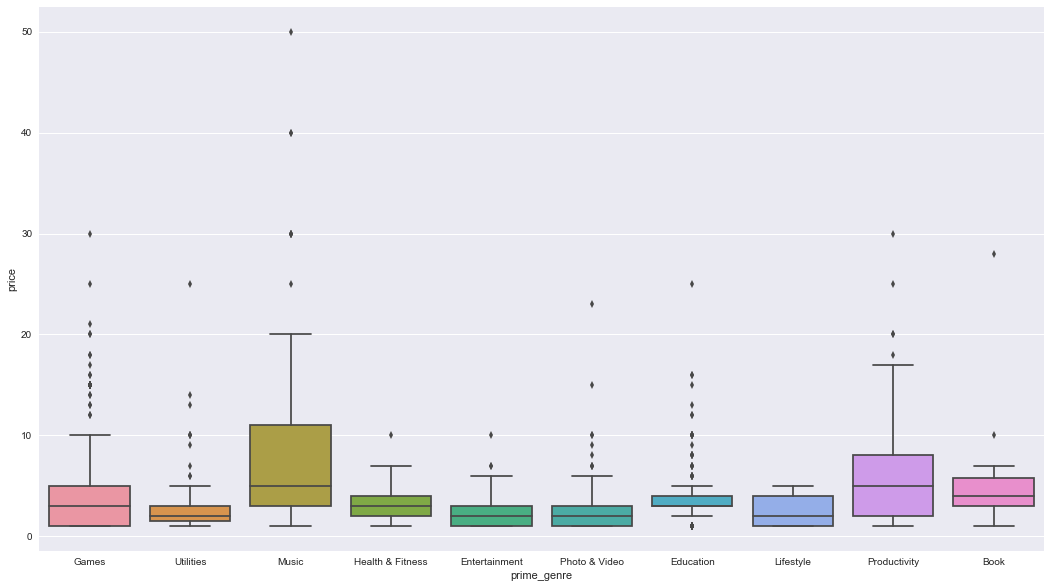

In [14]:
# 选取topN分类进行分析
N = 10
top_cats = normal_apps['prime_genre'].value_counts()[:N].index.tolist()
top_apps = normal_apps[normal_apps['prime_genre'].isin(top_cats)]

# 可视化结果
plt.figure(figsize=(18, 10))
sns.boxplot(data=top_apps, x='prime_genre', y='price')

##### 结论：
通过观察不同收费App的价格分布，发现：

* “娱乐”、“图像/视频”类App定价较低
* “游戏”、“音乐”、“效率”类App定价较高

#### 4.2.3 收费App与免费App的对比

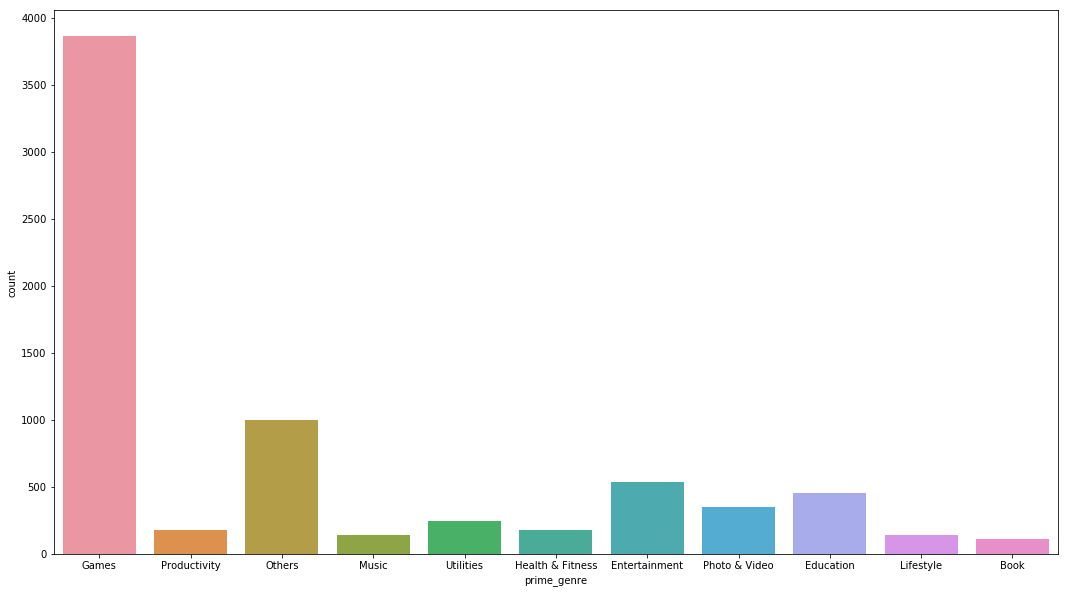

In [17]:
# 将数据中不属于topN类的App归为"Others"类
app_store_data_new = app_store_data.copy()
other_cat_index = app_store_data[~app_store_data['prime_genre'].isin(top_cats)].index
app_store_data_new.loc[other_cat_index, 'prime_genre'] = 'Others'

# 可视化处理结果
plt.figure(figsize=(18, 10))
sns.countplot(app_store_data_new['prime_genre'])

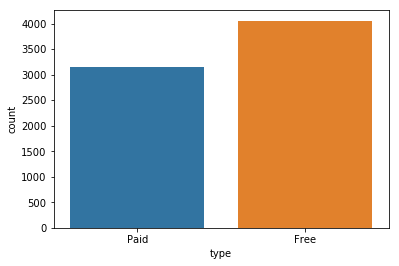

In [18]:
import numpy as np

# 为数据添加一列，表示App的收费类别：Paid, Free
app_store_data_new['type'] = np.where(app_store_data_new['price'] == 0, 'Free', 'Paid')

# 查看结果
sns.countplot(app_store_data_new['type'])

In [19]:
# 通过层级分组分析收费和免费App的数量
free_paid_app_count = app_store_data_new.groupby(['prime_genre', 'type']).size().to_frame()
free_paid_app_count.columns = ['count']
free_paid_app_count

count
prime_genre      type       
Book             Free     66
                 Paid     46
Education        Free    132
                 Paid    321
Entertainment    Free    334
                 Paid    201
Games            Free   2257
                 Paid   1605
Health & Fitness Free     76
                 Paid    104
Lifestyle        Free     94
                 Paid     50
Music            Free     67
                 Paid     71
Others           Free    692
                 Paid    306
Photo & Video    Free    167
                 Paid    182
Productivity     Free     62
                 Paid    116
Utilities        Free    109
                 Paid    139

In [20]:
# 使用透视表进行转换
free_paid_app_count_pivot = free_paid_app_count.pivot_table(index=['prime_genre'], columns=['type'], values=['count'])
free_paid_app_count_pivot

count      
type              Free  Paid
prime_genre                 
Book                66    46
Education          132   321
Entertainment      334   201
Games             2257  1605
Health & Fitness    76   104
Lifestyle           94    50
Music               67    71
Others             692   306
Photo & Video      167   182
Productivity        62   116
Utilities          109   139

In [21]:
# 重设层级列
free_paid_app_count_pivot.columns = free_paid_app_count_pivot.columns.droplevel()
free_paid_app_count_pivot

type,Free,Paid
prime_genre,,
Book,66,46
Education,132,321
Entertainment,334,201
Games,2257,1605
Health & Fitness,76,104
Lifestyle,94,50
Music,67,71
Others,692,306
Photo & Video,167,182


In [23]:
# 添加两列分别表示收费App与免费App的比例
free_paid_app_count_pivot['Free Percent'] = 100 * free_paid_app_count_pivot['Free'] / (free_paid_app_count_pivot['Free'] + free_paid_app_count_pivot['Paid'])
free_paid_app_count_pivot['Paid Percent'] = 100 * free_paid_app_count_pivot['Paid'] / (free_paid_app_count_pivot['Free'] + free_paid_app_count_pivot['Paid'])
free_paid_app_count_pivot

type,Free,Paid,Free Percent,Paid Percent
prime_genre,,,,
Book,66,46,58.928571,41.071429
Education,132,321,29.139073,70.860927
Entertainment,334,201,62.429907,37.570093
Games,2257,1605,58.441222,41.558778
Health & Fitness,76,104,42.222222,57.777778
Lifestyle,94,50,65.277778,34.722222
Music,67,71,48.550725,51.449275
Others,692,306,69.338677,30.661323
Photo & Video,167,182,47.851003,52.148997


使用堆叠柱状图分析结果

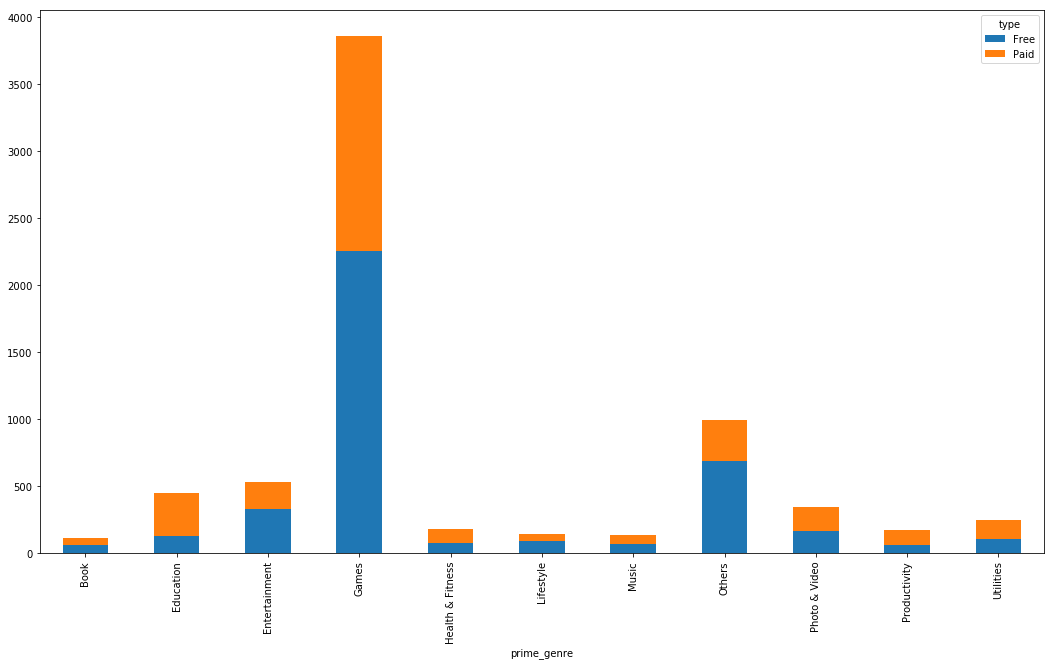

In [22]:
free_paid_app_count_pivot[['Free', 'Paid']].plot(kind='bar', stacked=True, figsize=(18, 10))

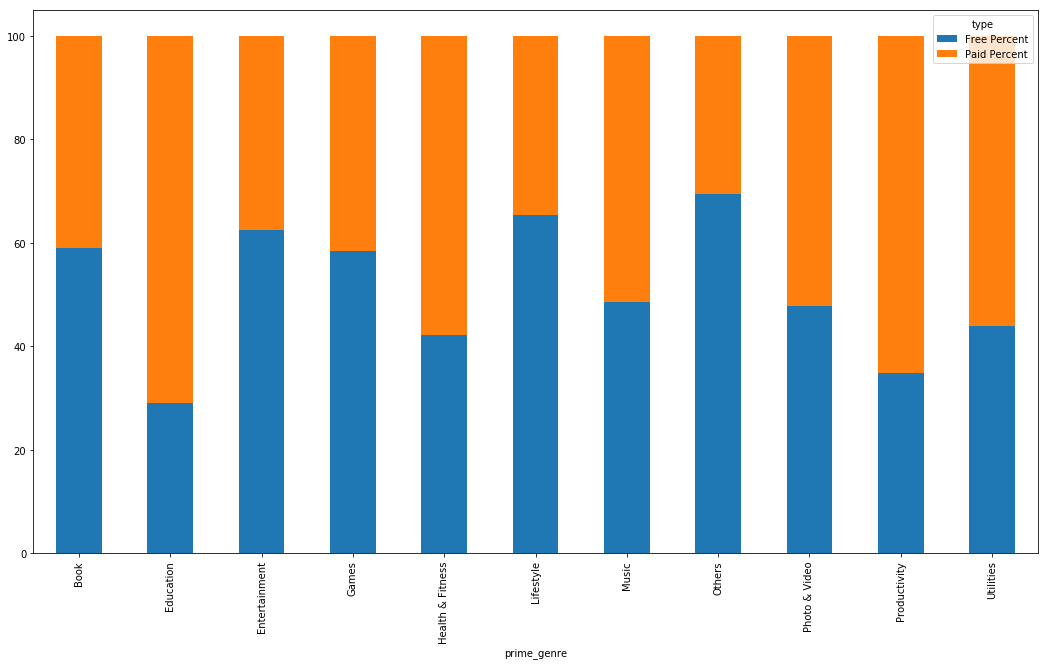

In [24]:
free_paid_app_count_pivot[['Free Percent', 'Paid Percent']].plot(kind='bar', stacked=True, figsize=(18, 10))

##### 结论
通过分析收费App与免费App的数量，可以得出：
* “教育”类App的收费比例最高
* 除“其他”类外，“生活”类App的免费比例最高

#### 4.2.4 收费App与评分的关系？

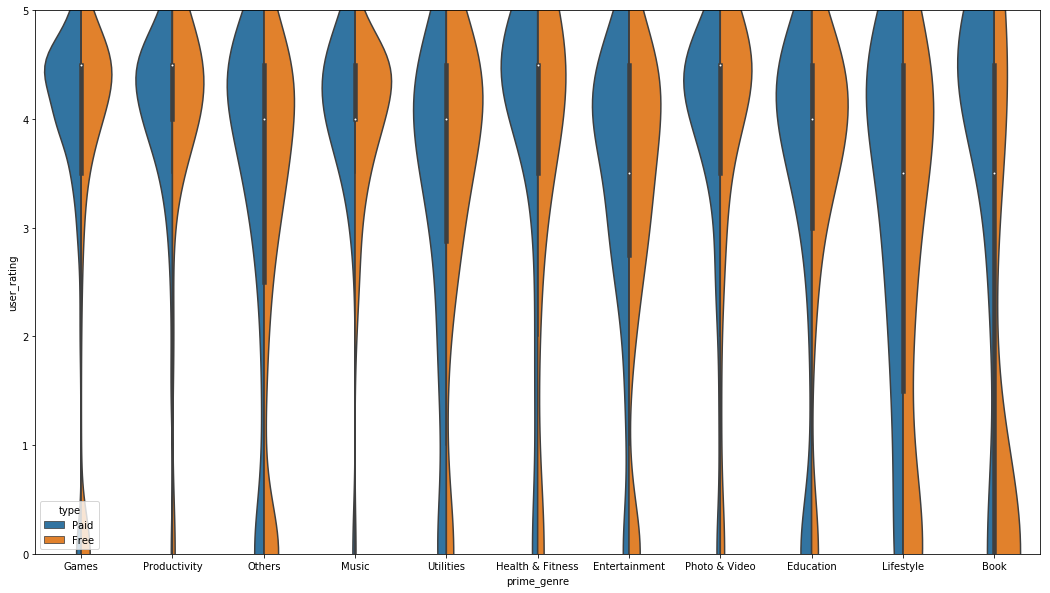

In [26]:
plt.figure(figsize=(18, 10))
plt.ylim([0, 5])
sns.violinplot(data=app_store_data_new, y='user_rating', x='prime_genre', hue='type', split=True)

##### 结论
通过分析小提琴图，可以得出：
* App的收费与评分没有直接的关系
* “图书”类收费App的评分比免费App的评分要高

#### 4.2.5 App的价格和大小的关系？

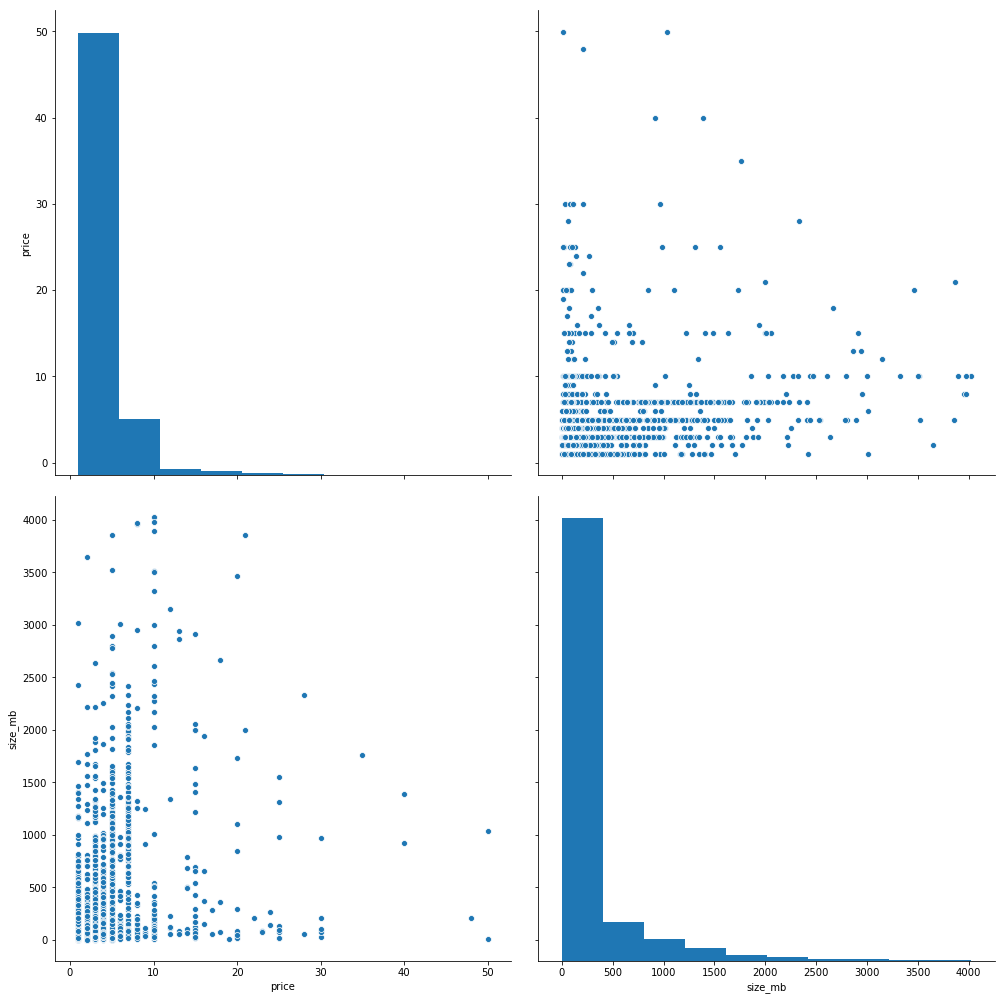

In [27]:
# 将App的大小单位由Bytes转换为M
normal_apps['size_mb'] = normal_apps['size_bytes'] / 1000000

sns.pairplot(normal_apps[['price', 'size_mb']], height=7)

##### 结论
* App的价格与大小没有直接的关系

## 5. 项目总结
该项目涵盖了Python常用的数据分析工具包括：Pandas, NumPy, Seaborn；并通过常用的分析方法及可视化方法完成了移动应用数据的分析。
课后，学员可以模仿随堂代码及参考资料，在提供的数据集上进行更深层次的分析。
该项目涉及到的相关知识点有：
* 数据读取
* 数据过滤
* 可视化分析结果
    * 盒形图
    * 直方图
    * 堆叠柱状图
    * 小提琴图
    * 二元关系图
* 层级索引
* 透视表

## 6. 参考
* [使用Seaborn查看数据分布](https://seaborn.pydata.org/tutorial/distributions.html)
* [盒形图概念](https://baike.baidu.com/item/%E7%AE%B1%E5%BD%A2%E5%9B%BE/10671164)
* [使用Seaborn绘制盒形图](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
* [详解Pandas透视表](http://python.jobbole.com/81212/)
* [小提琴图概念](https://datavizcatalogue.com/methods/violin_plot.html)
* [使用Seaborn绘制小提琴图](http://seaborn.pydata.org/generated/seaborn.violinplot.html)
* [使用Seaborn绘制二元关系图](http://seaborn.pydata.org/generated/seaborn.pairplot.html)